$$\xi_{as}(t_d) = \frac{128 L^{2} n_{as} \xi_{1} \xi_{2} \xi_{3} \log{\left(2 \right)}^{\frac{3}{2}} \int\limits_{-\infty}^{\infty} f^2(t'-t_d) \left|{\kappa_{A} \kappa_{Q} \int\limits_{- t_{0}}^{\infty} H{\left(t' - \theta \right)} e^{- \frac{t'+\theta}{T_{2}}+ i\Delta\omega\theta} f^2(\theta)\, d\theta}\right|^{2}\, dt'}{3 \pi^{\frac{7}{2}} c^{2} \epsilon_{0}^{2} n_{1} n_{2} n_{3} \tau^{3} w_{0}^{4}}$$

$$f(t)=e^{- \frac{2\log{\left(2 \right)}t^{2}}{\tau^{2}}}$$

$$\kappa_A = \frac{N \left(\frac{\partial\alpha}{\partial{q}}\right)_0 \omega_{as}}{2 c \epsilon_{0} n_{as}}$$

$$\kappa_Q = - \frac{\left(\frac{\partial\alpha}{\partial{q}}\right)_0}{2 \Omega_{R} m}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

In [2]:
L = 10e-6
wl1,wl2,wl3 = 1000e-9,1100e-9,800e-9
nas,n1,n2,n3 = 1.5,1.5,1.5,1.5
xi1,xi2,xi3 = 1e-9,1e-9,1e-9
c = 3e8
eps0 = 8.85418782e-12
tau = 100e-15
w0 = 1e-6
om1,om2,om3 = 2*np.pi*c/wl1,2*np.pi*c/wl2,2*np.pi*c/wl3
omR = (om1-om2)*0.95
delom = om1-om2-omR
omas = om1-om2+om3
N = 4/(5.43e-10)**3
m = 14*1.6605e-24
pol_ten = (1e-23/N)**0.5
kappaA = N*pol_ten*omas/2/c/eps0/nas
kappaQ = -pol_ten/2/omR/m

def f(t,tau):
    return np.exp(-2*np.log(2)*t**2/tau**2)

In [3]:
Smax = 128*L**2*nas*xi1*xi2*xi3*np.log(2)**(3/2)*kappaA**2*kappaQ**2/3/np.pi**(7/3)/c**2/eps0**2/n1/n2/n3/tau**3/w0**4
Smax

np.float64(1.884293617109877e+36)

In [63]:
#lets model the time evolution of the coherent amplitude Q(t')
def Q(tp,T2,delom,tau):
    """Scalar or array input - handles both"""
    # Handle array input
    if isinstance(tp, np.ndarray):
        return np.array([Q(t, T2, delom, tau) for t in tp])
    
    # Scalar case
    the = np.linspace(tp-50*tau,tp+50*tau,500)
    dthe = the[1]-the[0]
    return np.sum(np.abs(np.heaviside(tp, the)*np.exp(-(tp+the)/T2+1j*delom*the)*f(the,tau)**2)**2)*(dthe)

def sig(td,T2,delom,tau):
    """Scalar or array input - handles both"""
    # Handle array input
    if isinstance(td, np.ndarray):
        return np.array([sig(t, T2, delom, tau) for t in td])
    
    # Scalar case
    tp = np.linspace(td-1*tau,td+5*tau,500)
    dtp = tp[1]-tp[0]
    return np.sum(f(tp-td,tau)**2*Q(tp,T2,delom,tau))*dtp

td_arr = np.linspace(-1e-12,3e-12,500)
tau = 100e-15
T2 = 0.1e-12
delom = 0

td = 0
tp_arr = np.linspace(td-1*tau,td+5*tau,500)
Q_arr = Q(tp_arr, T2, delom, tau)

sig_arr = sig(td_arr,T2,delom,tau)

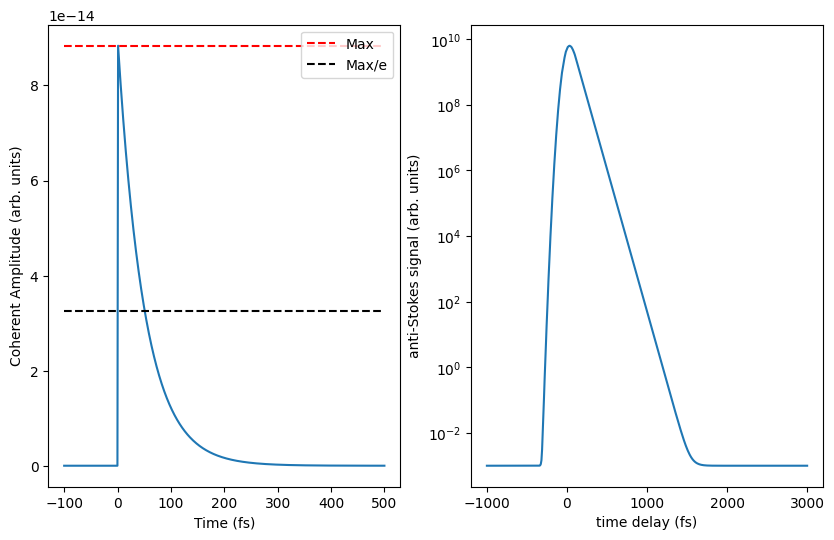

In [68]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.plot(tp_arr*1e15, Q_arr)
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('Coherent Amplitude (arb. units)')
ax1.hlines(np.max(Q_arr), np.min(tp_arr*1e15), np.max(tp_arr*1e15), color='r', linestyle='--', label='Max')
ax1.hlines(np.max(Q_arr)/np.exp(1), np.min(tp_arr*1e15), np.max(tp_arr*1e15), color='k', linestyle='--', label='Max/e')
ax1.legend()
ax2.plot(td_arr*1e15, Smax * sig_arr+1e-3)
ax2.set_xlabel('time delay (fs)')
ax2.set_ylabel('anti-Stokes signal (arb. units)')
ax2.set_yscale('log')
plt.show()